In [1]:
import sympy as sym
# import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

# Caracterización de Sistemas LTI en el Dominio del Tiempo

## Respuesta al impulso

A continuación se discutirá sobre la respuesta $y(t)$, de un sistema $\mathcal{H}$ que es  LTI, ante una señal de entrada $x(t)$. 

![bloque](figuras/bloque_tiempo.PNG)


Tenga en cuenta que la señal de entrada puede representarse como una integral:

\begin{equation}
x(t) = \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau
\end{equation}

Si se introduce esta representación de la señal de entrada en la transformación que realiza el sistema $\mathcal{H}$ para formar la salida  $y(t) = \mathcal{H} \{ x(t) \}$, se obtiene:


\begin{equation}
y(t) = \mathcal{H} \left\{ \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau \right\}
\end{equation}


donde $\mathcal{H} \{ \cdot \}$ representa un operador que encuentra la salida del sistema. Como $x(\tau)$ puede verse como una constante ante la variable $t$, la expresión para $y(t)$ puede escribirse como:


\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot \mathcal{H} \left\{ \delta(t-\tau) \right\} \; d \tau 
\end{equation}

Observe que $\mathcal{H} \{\cdot\}$ opera únicamente sobre el impulso de Dirac.

La respuesta de un sistema ante una señal impulso de Dirac es conocida como la 
[*respuesta al impulso*](https://en.wikipedia.org/wiki/Impulse_response).

\begin{equation}
h(t) = \mathcal{H} \left\{ \delta(t) \right\}
\end{equation}

Si el sistema es invariante en el tiempo, la respuesta a un impulso desplazado es $\mathcal{H} \left\{ \delta(t-\tau) \right\} = h(t-\tau)$. Así, para un sistema LTI se obtiene que:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau 
\end{equation}


Esta operación es conocida como [*convolución*](https://en.wikipedia.org/wiki/Convolution). Se simboliza mediante $*$, de manera que la integral se represente como $y(t) = x(t) * h(t)$ o, para algunos autores, $y(t) = (x*h)(t)$.

La respuesta $y(t)$ de un sistema LTI $\mathcal{H}$ ante una entrada $x(t)$ se determina completamente a partir de su respuesta impulsional $h(t)$ como la convolución de la entrada $x(t)$ con la respuesta impulsional $h(t)$.

\begin{equation}
y(t) = x(t)*h(t)
\end{equation}


Un sistema LTI con $x(t)$ como entrada y $y(t)$ como salida es descrito mediante la siguiente Ecuación Diferencial Ordinaria (ODE):


\begin{equation}
y(t) + \frac{d}{dt} y(t) = x(t)
\end{equation}

![bloque](figuras/bloque_tiempo.PNG)


Se desea encontrar la respuesta del sistema ante una entrada $x(t) = 1 \cdot \epsilon(t)$


### Solución A
Primero, se va a resolver la ODE teniendo en cuenta  que deben satisfacerse las condiciones iniciales $y(t)\big\vert_{t = 0-} = 0$ y $\frac{d}{dt}y(t)\big\vert_{t = 0-} = 0$ relacionadas con la causalidad.

a. Defina la ODE en`SymPy`

\begin{equation}
y(t) + \frac{d}{dt} y(t) = x(t)
\end{equation}

In [2]:
t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t), x)
ode

Se resuelve la ODE para la entrada establecida y considerando que las constantes de integración deben garantiza las condiciones inicales.


In [3]:
xinput = sym.Heaviside(t)

solution = sym.dsolve(ode.subs(x, xinput))
solution

In [4]:
solution.rhs.limit(t, 0, '-')

In [6]:
integration_constants = sym.solve(
    (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1')
integration_constants

In [7]:


yA = solution.subs(integration_constants)
yA

Se grafica la señal de salida obtenida al resolver la ODE.

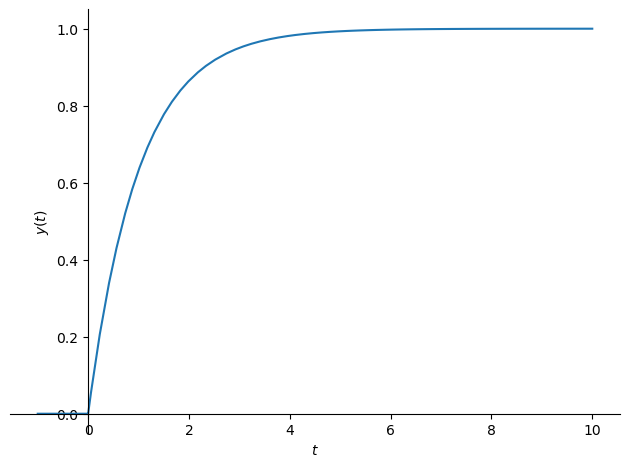

In [8]:
#plt.rcParams['figure.figsize'] = 7, 2
sym.plot(yA.rhs, (t,-1,10), ylabel=r'$y(t)$');

### Solución B
Ahora se va a resolver el problema a través de la respuesta impulsional.

La respuesta impulsional $h(t)$ se encuentra al resolver la ODE para una señal impulso de Dirac como entrada, $x(t) = \delta(t)$.

In [9]:
ode

In [11]:
h = sym.Function('h')(t)

solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
solution2

In [12]:

integration_constants = sym.solve((solution2.rhs.limit(
    t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1')

h = solution2.subs(integration_constants)
h

La respuesta impulsional se grafica.

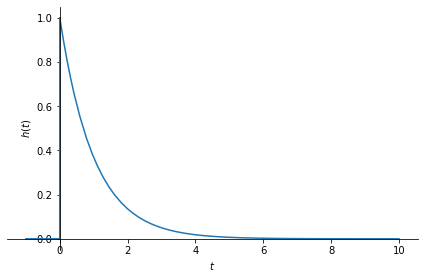

In [9]:
# plt.rcParams['figure.figsize'] = 7, 2
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

Ahora se calcula la convolución $y(t) = x(t) * h(t)$ como:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau 
\end{equation}

Debido a que $h(t)$ y $x(t)$ son señales causales, la expresión de convolución se convierte en:

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau \; \forall t \geq 0
\end{equation}


Observe que $y(t) = 0 \; \forall t<0$.

In [13]:
tau = sym.symbols('tau', real=True)

yB = sym.integrate(xinput.subs(t, tau) * h.rhs.subs(t, t-tau), (tau, 0, t))
yB

La señal de salida obtenida mediante el método de convolución se grafica.

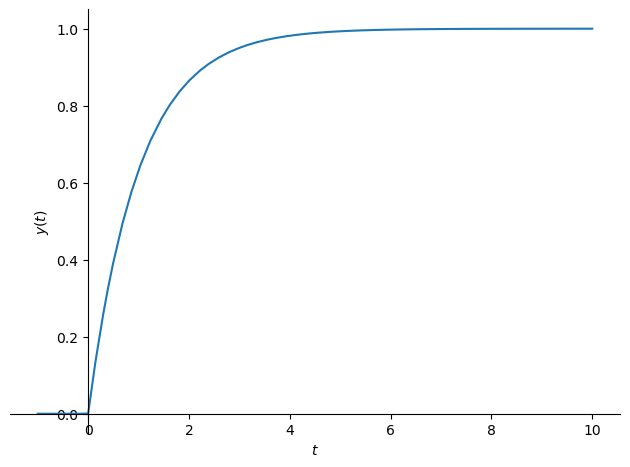

In [14]:
#plt.rcParams['figure.figsize'] = 7, 2
sym.plot(yB, (t,-1,10), ylabel=r'$y(t)$');

Las señales obtenidas con los dos métodos deben ser iguales.

In [15]:
yA

In [16]:
yB

Puede observarse que $y_A(t) = y_B(t)$, aunque tengan expresiones diferentes.

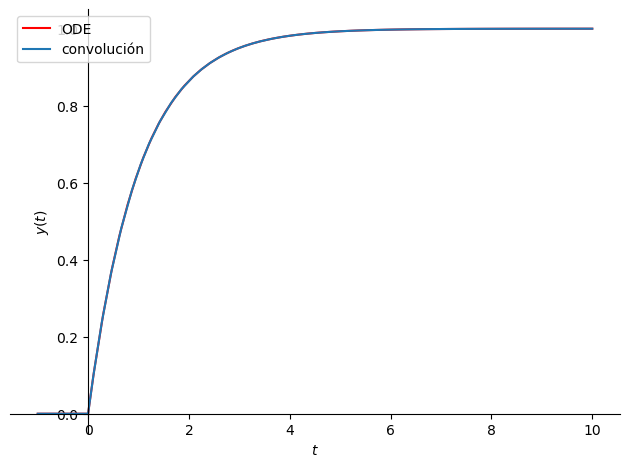

In [17]:
# plt.rcParams['figure.figsize'] = 7, 2
graf1 = sym.plot(yA.rhs, (t,-1,10), ylabel=r'$y(t)$', show=False, line_color='red',legend=True, label = 'ODE')
graf2 = sym.plot(yB, (t,-1,10), show=False, legend=True, label = 'convolución')
graf1.extend(graf2)
graf1.show()

## Convolución

A partir del estudio de la respuesta impulsional se observa que la [convolución](https://en.wikipedia.org/wiki/Convolution) resulta una operación relevante en el análisis de sistemas. 
En esta sección, se estudiarán las propiedades y se interpretará la convolución.

La  convolución de dos señales $x(t)$ y $h(t)$ es:

\begin{equation}
(x * h)(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau = 
\int_{-\infty}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

Note que $*$ se usa como notación para la convolución.


### Propiedades

Dadas las señales $x(t)$, $h(t)$, $g(t) \in \mathbb{C}$ la convolución cumple con: 

\begin{equation}
(x * h)(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t - \tau) \; d\tau = 
\int_{-\infty}^{\infty} x(t - \tau) \cdot h(\tau) \; d\tau
\end{equation}

1. El impulso de Dirac es el [elemento identidad](https://en.wikipedia.org/wiki/Identity_element) de la convolución
    \begin{equation}
    x(t) * \delta(t) = x(t)
    \end{equation}

2. La convolución es [conmutativa](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    x(t) * h(t) = h(t) * x(t)
    \end{equation}

3. La convolución es [asociativa](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left[ x(t) * h(t) \right] * g(t) = x(t) * \left[ h(t) * g(t) \right] 
    \end{equation}

5. La convolución es [distributiva](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    x(t) * \left[ h(t) + g(t) \right] = x(t) * h(t) + x(t) * g(t)
    \end{equation}

5. Multiplicación por un escalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left[ x(t) * h(t) \right] = \left[ a \cdot x(t) \right] * h(t) = x(t) * \left[ a \cdot h(t) \right]
    \end{equation}

6. Derivada de la convolución
    \begin{equation}
    \frac{d}{dt} \left[ x(t) * h(t) \right] =  \frac{d x(t)}{dt} * h(t) = x(t) * \frac{d h(t)}{dt}
    \end{equation}



### Interpretación

La convolución puede someterse a una [interpretación gráfica](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). 

La operación de convolución:

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}


Puede descomponerse en:

1. sustituir $t$ por $\tau$ en $x(t)$ y $h(t)$,

2. invertir el tiempo en $h(\tau)$,

3. desplazar $h(-\tau)$ un tiempo $t$ para obtener $h(t - \tau)$,

4. buscar los traslapes temporales entre $h(t - \tau)$ y $x(\tau)$, calcular la integral en el periodo de traslape para obtener $y(t)$

Considere el siguiente ejemplo.

**Ejemplo**

La convolución $y(t) = x(t) * h(t)$ se ilustra para un par de señales definidas.

\begin{align}
h(t) &= e^{-t} \theta(t) \\
x(t) &= \frac{3}{4} \cdot \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


(Se van a definir nuevas funciones para facilitar los códigos.)

In [19]:
t, tau = sym.symbols('t tau', real=True)

"""class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)
"""

def rect(t):
    Esc1 = sym.Heaviside(t+0.5)
    Esc2 = sym.Heaviside(t-0.5)
    return Esc1 - Esc2

def plot_signals(t, x, h, Xlab, Hlab):
    #plt.rcParams['figure.figsize'] = 7, 2

    p1 = sym.plot(x, t, show=False,
                  line_color='red', ylabel='Amp', xlabel='t',
                  legend=True, label = Xlab)
    p2 = sym.plot(h, t, show=False, 
                  line_color='blue',
                  label = Hlab,legend=False)
    p1.extend(p2)
    p1.show()

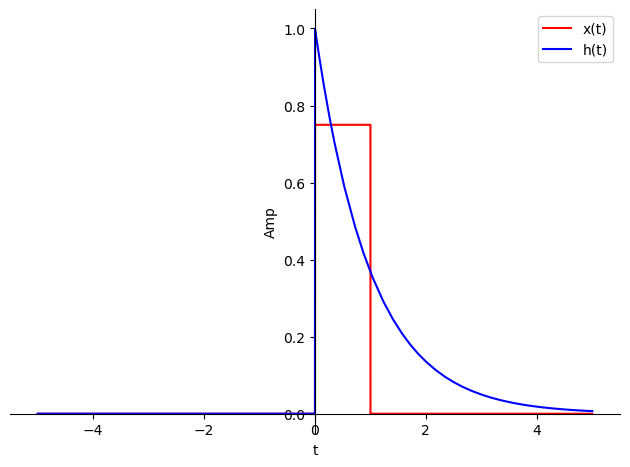

In [33]:
h = sym.exp(-1*t) * sym.Heaviside(t)
x = sym.Rational(3, 4) * rect((t-0.5))

plot_signals((t, -5, 5), x, h, 'x(t)', 'h(t)')

**Primero** se sustituye $t$ por $\tau$ para obtener $h(\tau)$ y $x(\tau)$.
El eje horizontal representará a $\tau$, la variable de integración.

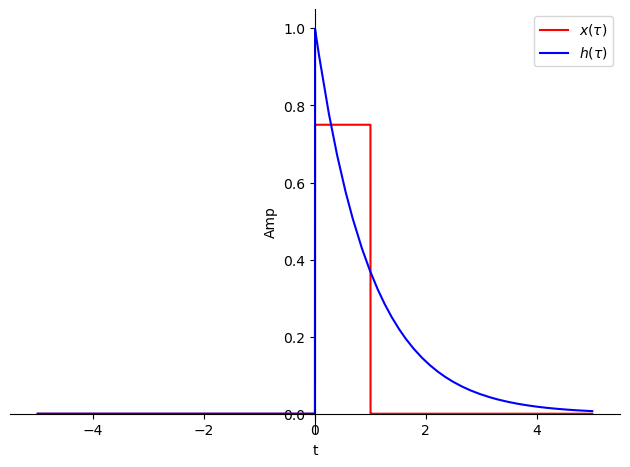

In [34]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals((tau,-5, 5), x1, h1, r'$x(\tau)$', r'$h(\tau)$')

**Segundo** se invierte el tiempo de $h(\tau)$ para obtener $h(-\tau)$.


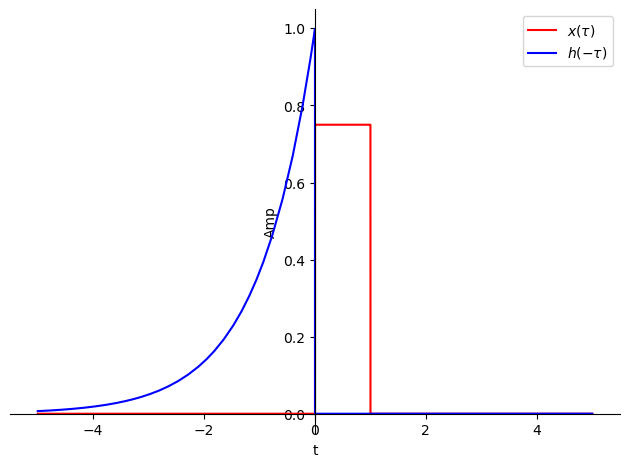

In [35]:
h2 = h1.subs(tau, -tau)

plot_signals((tau, -5, 5), x1, h2, r'$x(\tau)$', r'$h(-\tau)$')

**Tercero** la señal $h(-\tau)$ se desplaza un tiempo $t$ para obtener $h(t - \tau)$. Se desplaza a la **derecha** si $t>0$ y a la **izquierda** si $t<0$.

In [36]:
h2

In [37]:
h3 = h2.subs(tau, -t+tau)
h3

**Cuarto** se buscan los traslapes temporales entre $h(t - \tau)$ y $x(\tau)$ para calcular la integral en el periodo de traslape para obtener $y(t)$

La señal $x(\tau)$ se "enciende" en $t=0$ y se "apaga" en $t=1$. Así, se pueden identificar 3 casos para las señales definidas.

1. si $t<0$ no hay traslape,
2. si $0 \leq t < 1$ hay traslape parcial,
3. si $t > 1$ hay traslape completo.

1. si $t<0$ no hay traslape

Esta situación se ilustra con $t=-1.2$

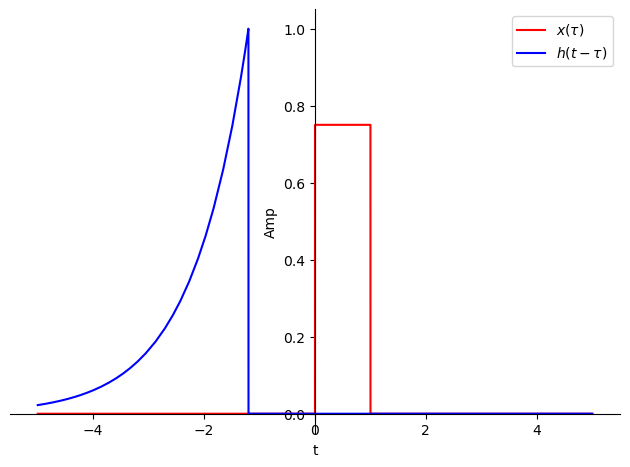

In [38]:
plot_signals((tau,-5, 5), x1, h3.subs(t, -1.2), r'$x(\tau)$', r'$h(t-\tau)$')

Se observa que la convolución da:

\begin{equation}
y(t) = 0 \qquad \forall t < 0
\end{equation}

2. si $0 \leq t < 1$ hay traslape parcial,

Esta situación se ilustra con $t=0.5$

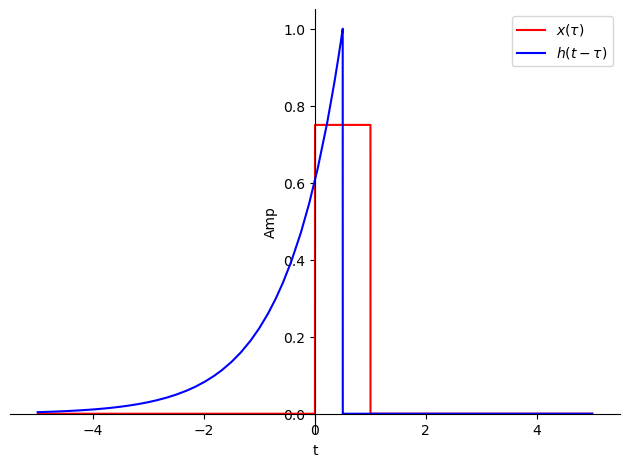

In [39]:
plot_signals((tau,-5, 5), x1, h3.subs(t, 0.5), r'$x(\tau)$', r'$h(t-\tau)$')

La integral de la convolución queda como:

\begin{equation}
y(t) = \frac{3}{4}\int_{0}^{t} e^{-(t - \tau)} d\tau = \frac{3}{4} (1 - e^{-t}) \qquad 0 \leq t < 1
\end{equation}

3. si $t > 1$ hay traslape completo.

Esta situación se ilustra con $t=1.5$

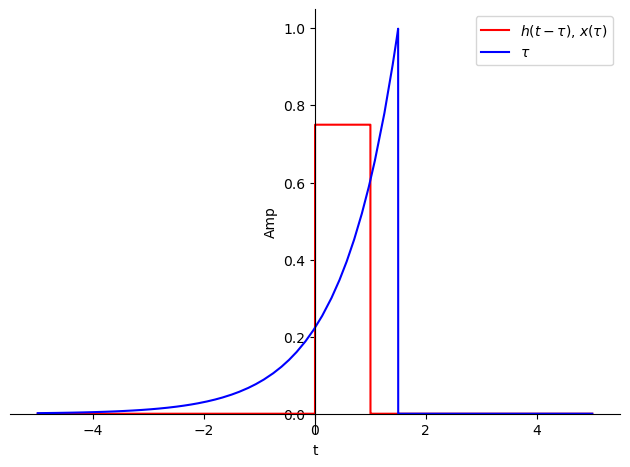

In [40]:
plot_signals((tau, -5, 5), x1, h3.subs(t, 1.5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

En este caso, la integral de la convolución queda como:

\begin{equation}
y(t) = \frac{3}{4} \int_{0}^{1} e^{-(t - \tau)} d\tau = \frac{3}{4} (e - 1) e^{-t} \qquad \forall t \geq 1
\end{equation}

Así, la señal de salida completa corresponde a la composición de los tres casos identificados.

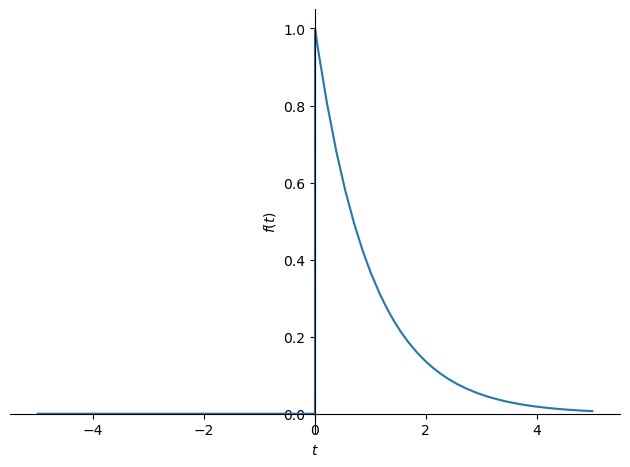

In [41]:
sym.plot(h,(t,-5,5))

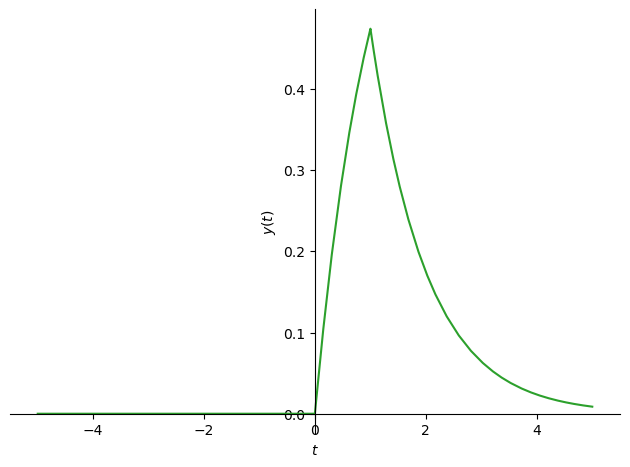

In [42]:
y = sym.integrate(h.subs(t,t-tau) * x.subs(t, tau), (tau, -100, 100))
sym.plot(y, (t,-5, 5), ylabel=r'$y(t)$', line_color='C2');

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from animation import animate_convolution
plt.rcParams['animation.html'] = 'jshtml'

anim = animate_convolution(x, h, y, t, tau, np.arange(-4, 4, .1), np.arange(-5, 5, 0.1))
anim

C:\Users\pierr\Documents\Control\animation.py:35: SymPyDeprecationWarning: 

The Line2DBaseSeries.get_segments() method is deprecated.

Instead, use the MatplotlibBackend.get_segments() method, or use
The get_points() or get_data() methods.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-get-segments
for details.

This has been deprecated since SymPy version 1.9. It
will be removed in a future version of SymPy.

  line_x.set_segments(p[0].get_segments())


In [26]:
tau